In [1]:
import librosa
import matplotlib

print("librosa version:", librosa.__version__)
print("matplotlib version:", matplotlib.__version__)


librosa version: 0.10.1
matplotlib version: 3.8.0


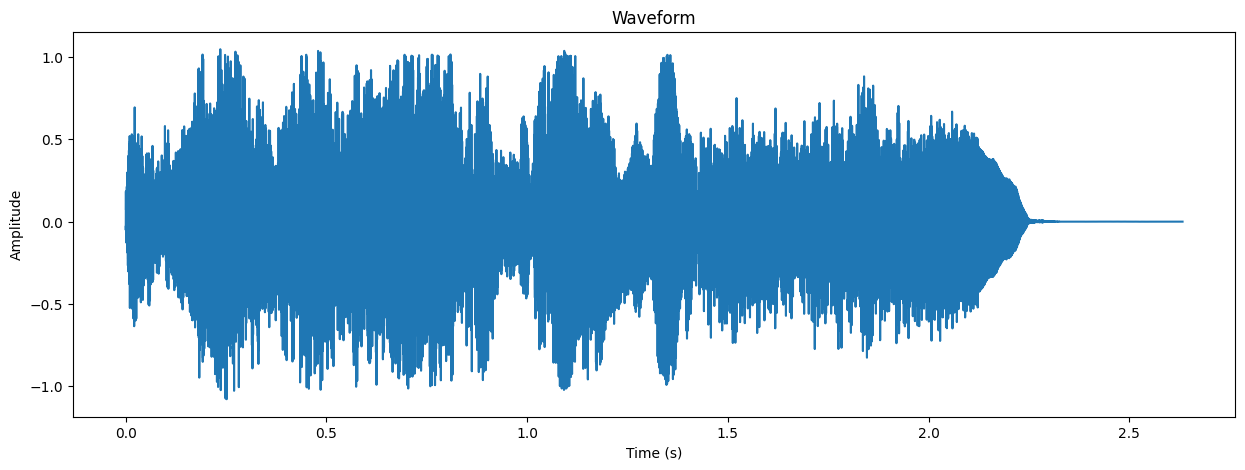

In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_path = "animal_mix.wav"
y, sr = librosa.load(audio_path)

# Generate time values for the x-axis
time = np.arange(0, len(y)) / sr

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(time, y)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


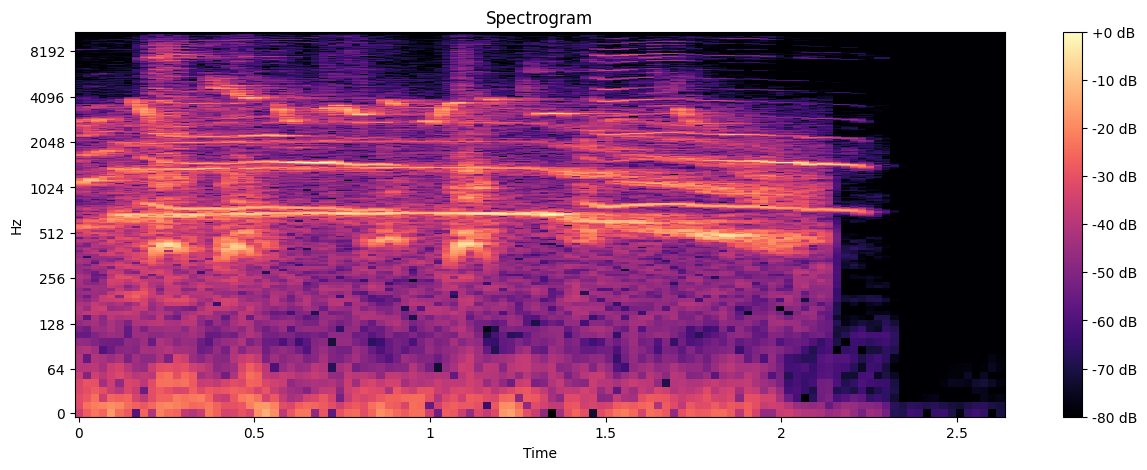

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
y, sr = librosa.load(audio_path)

# Compute the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


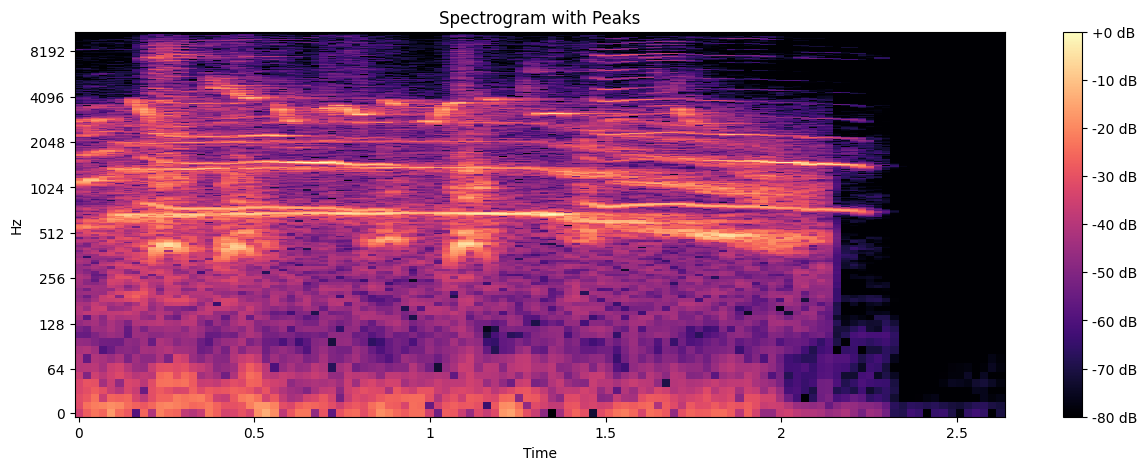

In [4]:
from scipy.signal import find_peaks

# Find peaks in the spectrogram
peaks, _ = find_peaks(D.max(axis=0), height=20)  # Adjust height parameter as needed

# Convert peak indices to corresponding frequencies
peak_freqs = librosa.fft_frequencies(sr=sr)[peaks]

# Display the spectrogram with identified peaks
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.scatter(librosa.frames_to_time(peaks), peak_freqs, color='red', s=5)
plt.title('Spectrogram with Peaks')
plt.show()


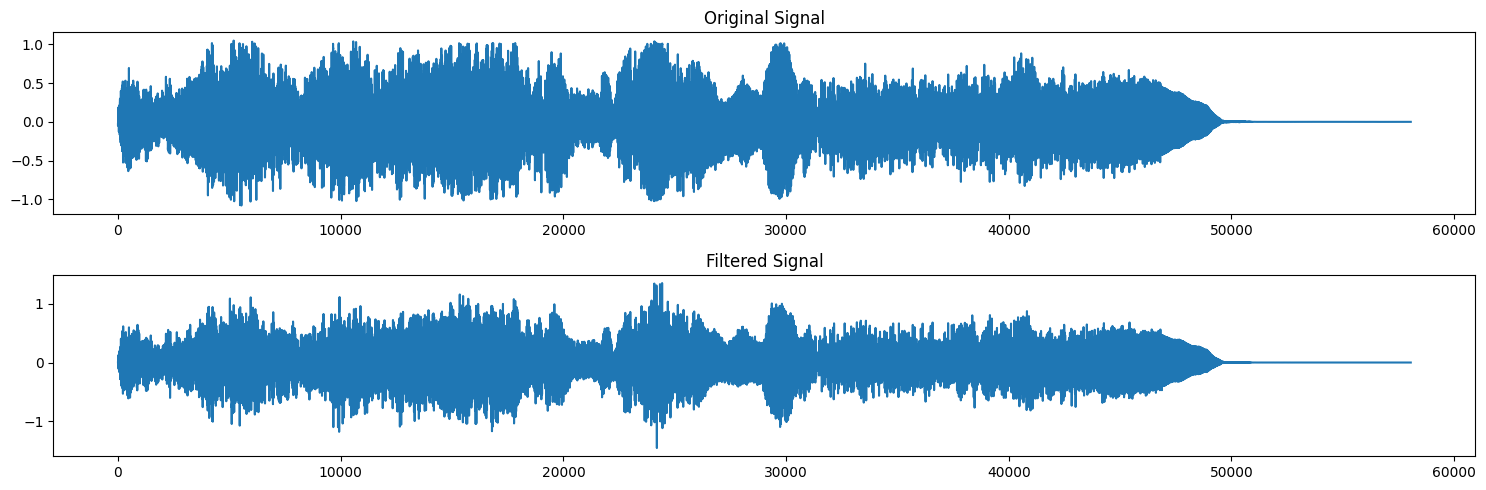

Playing original signal:


In [5]:
from scipy.signal import butter, lfilter
from IPython.display import Audio

# Design a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Specify the frequency range based on the identified peaks
low_freq = 265  # Adjust as needed
high_freq = 4000  # Adjust as needed

# Apply the bandpass filter to the audio signal
filtered_signal = bandpass_filter(y, low_freq, high_freq, sr)

# Plot the original and filtered signals
plt.figure(figsize=(15, 5))

plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title('Filtered Signal')

plt.tight_layout()
plt.show()

# Play the original audio
print("Playing original signal:")
Audio(y, rate=sr)


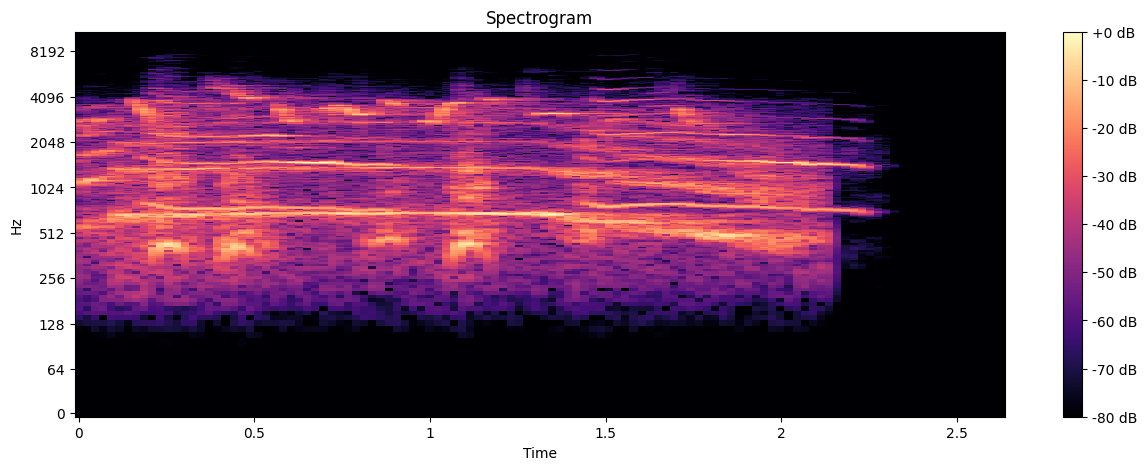

In [6]:
#plot spectrogram of filtered signal
D = librosa.amplitude_to_db(np.abs(librosa.stft(filtered_signal)), ref=np.max)

# Display the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [7]:
# Play the filtered audio
print("Playing filtered signal:")
Audio(filtered_signal, rate=sr)

Playing filtered signal:


In [8]:
from scipy.signal import get_window, butter, lfilter

# Function to alter amplitudes using a window function
def alter_amplitudes(signal, window_type='hamming', scale_factor=1.0):
    window = get_window(window_type, len(signal))
    altered_signal = signal * window * scale_factor
    return altered_signal

In [9]:
# Choose a window type ('rectangle', 'hamming', 'hanning', 'gaussian', etc.)
window_type = 'hamming'  # Adjust as needed

# Alter amplitudes of both the original and filtered signals
altered_filtered = alter_amplitudes(filtered_signal, window_type, 500)

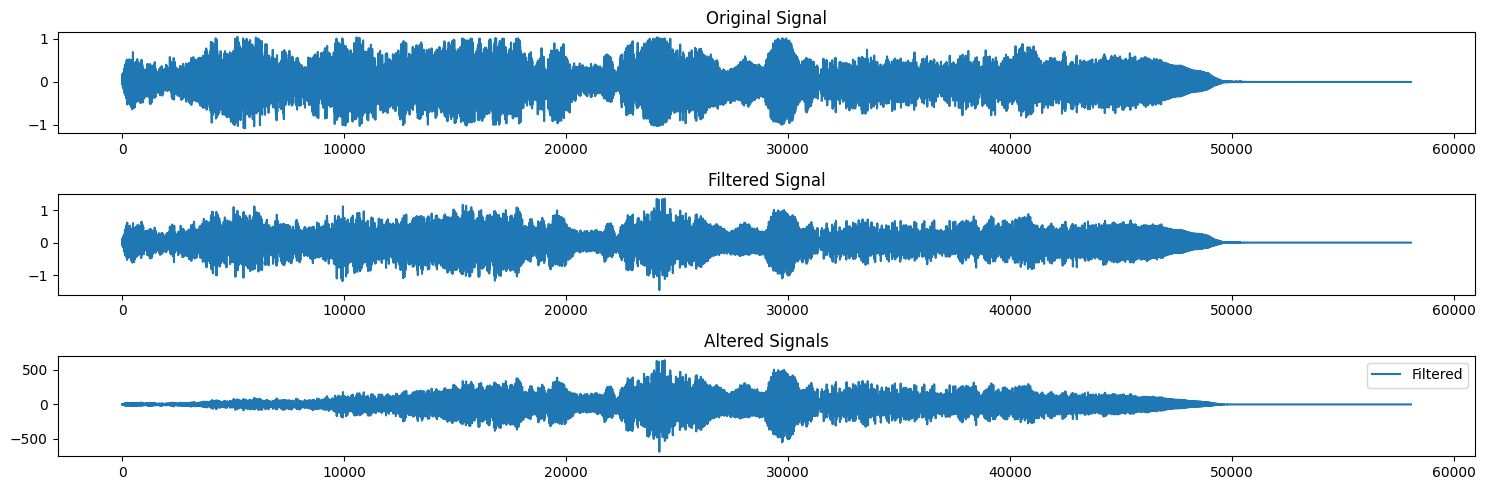

Playing original signal:


In [10]:
# Plot the original and altered signals
plt.figure(figsize=(15, 5))

plt.subplot(3, 1, 1)
plt.plot(y)
plt.title('Original Signal')

plt.subplot(3, 1, 2)
plt.plot(filtered_signal)
plt.title('Filtered Signal')

plt.subplot(3, 1, 3)
plt.plot(altered_filtered, label='Filtered')
plt.title('Altered Signals')
plt.legend()

plt.tight_layout()
plt.show()

# Play the altered signals
print("Playing original signal:")
Audio(y, rate=sr)

In [11]:
# Play the filtered audio
print("Playing filtered signal:")
Audio(filtered_signal, rate=sr)

Playing filtered signal:


In [12]:

print("Playing altered filtered signal:")
Audio(altered_filtered, rate=sr)

Playing altered filtered signal:
